In [65]:
import pandas as pd
import re
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 


In [2]:
diamonds=pd.read_csv("../input/data.csv")
display(diamonds.head(10))

carat        cut color clarity  depth  table     x     y     z  price
0   2.26      Ideal     G     SI2   61.9   57.0  8.44  8.36  5.20  12831
1   2.43  Very Good     H     SI2   63.2   57.0  8.56  8.50  5.39  16170
2   0.80    Premium     F     SI2   61.0   57.0  6.03  6.01  3.67   2797
3   0.40      Ideal     F      I1   63.3   60.0  4.68  4.64  2.95    630
4   0.31      Ideal     G     VS2   61.6   55.0  4.39  4.37  2.70    698
5   0.53  Very Good     F     SI2   60.5   60.0  5.19  5.23  3.15   1132
6   0.70    Premium     D     SI2   60.8   61.0  5.69  5.64  3.45   1987
7   1.13       Good     F     SI2   64.0   58.0  6.52  6.58  4.19   3952
8   0.35      Ideal     E     SI1   60.9   55.0  4.53  4.57  2.77    614
9   1.01       Fair     H     VS1   61.4   66.0  6.34  6.24  3.87   5062

In [3]:
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [4]:
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [5]:
diamonds.info()
#More powerful than dtypes in terms of information you can quickly grassp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 10 columns):
carat      40455 non-null float64
cut        40455 non-null object
color      40455 non-null object
clarity    40455 non-null object
depth      40455 non-null float64
table      40455 non-null float64
x          40455 non-null float64
y          40455 non-null float64
z          40455 non-null float64
price      40455 non-null int64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.1+ MB


In [6]:
#diamonds.isnull().sum()

In [7]:
#looking at all the variables which are objects cut, color, clarity

print("Cut: ",set(diamonds["cut"]))
print("Color: ",set(diamonds["color"]))
print("Clarity: ",set(diamonds["clarity"]))

# I have to process these variables somehow before training a model. Not sure if I should keep color

Cut:  {'Ideal', 'Good', 'Very Good', 'Premium', 'Fair'}
Color:  {'G', 'H', 'D', 'E', 'J', 'F', 'I'}
Clarity:  {'IF', 'SI2', 'VVS1', 'I1', 'VS1', 'SI1', 'VS2', 'VVS2'}


In [8]:
diamonds.shape


(40455, 10)

In [9]:
print(f' model has {diamonds.shape[0]} rows and {diamonds.shape[1]} columns and non nulls')

 model has 40455 rows and 10 columns and non nulls


In [10]:
diamonds['price/wt']=diamonds['price']/diamonds['carat']

In [11]:
diamonds.head(10)

carat        cut color clarity  depth  table     x     y     z  price  \
0   2.26      Ideal     G     SI2   61.9   57.0  8.44  8.36  5.20  12831   
1   2.43  Very Good     H     SI2   63.2   57.0  8.56  8.50  5.39  16170   
2   0.80    Premium     F     SI2   61.0   57.0  6.03  6.01  3.67   2797   
3   0.40      Ideal     F      I1   63.3   60.0  4.68  4.64  2.95    630   
4   0.31      Ideal     G     VS2   61.6   55.0  4.39  4.37  2.70    698   
5   0.53  Very Good     F     SI2   60.5   60.0  5.19  5.23  3.15   1132   
6   0.70    Premium     D     SI2   60.8   61.0  5.69  5.64  3.45   1987   
7   1.13       Good     F     SI2   64.0   58.0  6.52  6.58  4.19   3952   
8   0.35      Ideal     E     SI1   60.9   55.0  4.53  4.57  2.77    614   
9   1.01       Fair     H     VS1   61.4   66.0  6.34  6.24  3.87   5062   

      price/wt  
0  5677.433628  
1  6654.320988  
2  3496.250000  
3  1575.000000  
4  2251.612903  
5  2135.849057  
6  2838.571429  
7  3497.345133  
8  1754.285714  
9  5011.881188

In [12]:
print(diamonds.groupby('cut')['price/wt'].mean().sort_values())

cut
Fair         3737.468421
Good         3873.241694
Ideal        3922.272721
Very Good    4011.693218
Premium      4223.619019
Name: price/wt, dtype: float64


In [13]:
print(diamonds.groupby('color')['price/wt'].mean().sort_values())
print(diamonds.groupby('clarity')['price/wt'].mean().sort_values())


color
E    3787.426635
J    3826.604761
D    3948.783704
I    4000.546520
H    4016.204136
F    4129.482925
G    4182.615921
Name: price/wt, dtype: float64
clarity
I1      2776.012219
SI1     3856.733909
VVS1    3860.279651
SI2     4015.902895
VS2     4080.272657
VS1     4143.406705
VVS2    4198.660097
IF      4276.867594
Name: price/wt, dtype: float64


In [14]:
#delete the column create to analyse how important are categorical variables
diamonds = diamonds.drop(['price/wt','table'], axis=1)

In [15]:
#all categorical variables are relevant and have an impact in prices per carat thus I cannot delete anyone for now

In [16]:
diamonds['cut'].unique()

array(['Ideal', 'Very Good', 'Premium', 'Good', 'Fair'], dtype=object)

In [17]:
diamonds['color'].unique()

array(['G', 'H', 'F', 'D', 'E', 'I', 'J'], dtype=object)

In [18]:
diamonds['clarity'].unique()

array(['SI2', 'I1', 'VS2', 'SI1', 'VS1', 'VVS2', 'IF', 'VVS1'],
      dtype=object)

In [19]:
#converting categorical into numerical 
#using method ordinal encoding based on information 
diamonds['cut']=diamonds['cut'].map({'Fair':1,'Good':2,'Ideal':3,'Very Good':4,'Premium':5})
diamonds['color']=diamonds['color'].map({'E':1,'J':2,'D':3,'I':4,'H':5,'F':6,'G':7})
diamonds['clarity']=diamonds['clarity'].map({'I1':1,'SI1':2,'VVS1':3,'SI2':4,'VS2':5,'VS1':6,'VVS2':7,'IF':8})

In [20]:

# WARNING !!!!!!!
# create a new method of categorical to numerical using mean 
# and the other ordinal but with industry relevancy regarding cut, color, clarity



In [21]:
diamonds

carat  cut  color  clarity  depth     x     y     z  price
0       2.26    3      7        4   61.9  8.44  8.36  5.20  12831
1       2.43    4      5        4   63.2  8.56  8.50  5.39  16170
2       0.80    5      6        4   61.0  6.03  6.01  3.67   2797
3       0.40    3      6        1   63.3  4.68  4.64  2.95    630
4       0.31    3      7        5   61.6  4.39  4.37  2.70    698
...      ...  ...    ...      ...    ...   ...   ...   ...    ...
40450   1.11    5      5        2   62.8  6.63  6.56  4.14   5315
40451   0.73    3      6        5   62.6  5.77  5.74  3.60   2762
40452   1.26    4      4        6   59.2  7.09  7.02  4.18   6855
40453   0.72    3      7        4   61.4  5.76  5.83  3.56   2297
40454   0.54    5      7        2   60.8  5.27  5.23  3.19   1356

[40455 rows x 9 columns]

In [22]:
diamonds.describe()

carat           cut         color       clarity         depth  \
count  40455.000000  40455.000000  40455.000000  40455.000000  40455.000000   
mean       0.798385      3.589025      4.365023      4.356099     61.747932   
std        0.474353      1.054400      2.141903      1.803355      1.432322   
min        0.200000      1.000000      1.000000      1.000000     43.000000   
25%        0.400000      3.000000      3.000000      2.000000     61.000000   
50%        0.700000      3.000000      5.000000      5.000000     61.800000   
75%        1.040000      5.000000      6.000000      6.000000     62.500000   
max        5.010000      5.000000      7.000000      8.000000     79.000000   

                  x             y             z         price  
count  40455.000000  40455.000000  40455.000000  40455.000000  
mean       5.732041      5.735939      3.539537   3939.242813  
std        1.123169      1.152802      0.709709   4000.344155  
min        0.000000      0.000000      0.000000    326.000000  
25%        4.710000      4.720000      2.910000    950.000000  
50%        5.700000      5.710000      3.530000   2409.000000  
75%        6.540000      6.540000      4.040000   5331.000000  
max       10.740000     58.900000     31.800000  18823.000000

In [23]:
diamonds.skew()
#calculate level of skewness for each column being 0 best distribution

carat      1.109383
cut       -0.185133
color     -0.333214
clarity    0.042548
depth     -0.132900
x          0.376327
y          3.043535
z          1.886917
price      1.616622
dtype: float64

In [24]:
#applying z-score to identify outliers
z = np.abs(stats.zscore(diamonds))
print(z)

[[3.08132060e+00 5.58641912e-01 1.23021920e+00 ... 2.27627414e+00
  2.33966697e+00 2.22277553e+00]
 [3.43970798e+00 3.89776341e-01 2.96458384e-01 ... 2.39771889e+00
  2.60738551e+00 3.05746403e+00]
 [3.40547089e-03 1.33819459e+00 7.63338791e-01 ... 2.37737260e-01
  1.83828207e-01 2.85539665e-01]
 ...
 [9.73159554e-01 3.89776341e-01 1.70422024e-01 ... 1.11387439e+00
  9.02441129e-01 7.28885594e-01]
 [1.65247413e-01 5.58641912e-01 1.23021920e+00 ... 8.15940096e-02
  2.88332635e-02 4.10530456e-01]
 [5.44716402e-01 1.33819459e+00 1.23021920e+00 ... 4.38883491e-01
  4.92513366e-01 6.45763125e-01]]


In [25]:
threshold = 3
print(np.where(z > 3))
#all the data points which are outliers and where they are located, row first and column second

(array([    0,     1,     1, ..., 40324, 40335, 40437]), array([0, 0, 8, ..., 4, 4, 4]))


In [26]:
diamonds_z=diamonds[(z<3).all(axis=1)]
diamonds_z.shape

(38890, 9)

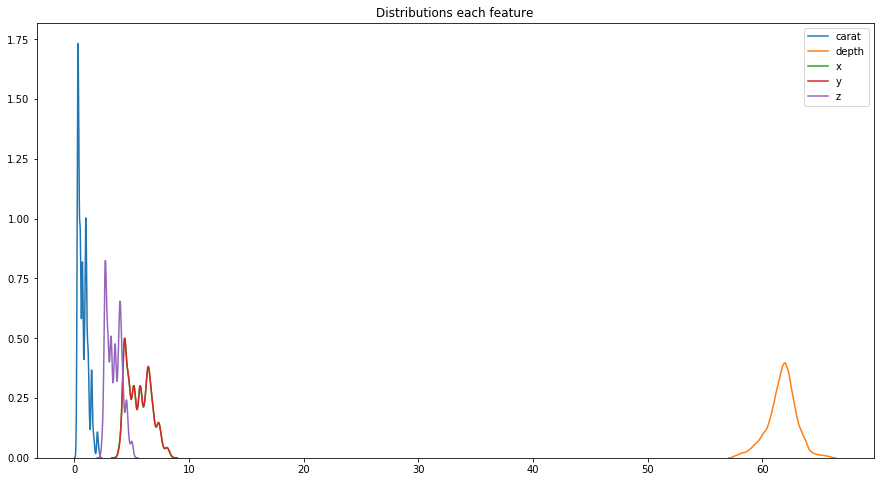

In [27]:

# Visualize the distribution of each non numerical variable

fig, (ax1) = plt.subplots(ncols=1, figsize=(15, 8))
ax1.set_title('Distributions each feature')

sns.kdeplot(diamonds_z['carat'], ax=ax1)
sns.kdeplot(diamonds_z['depth'], ax=ax1)
sns.kdeplot(diamonds_z['x'], ax=ax1)
sns.kdeplot(diamonds_z['y'], ax=ax1)
sns.kdeplot(diamonds_z['z'], ax=ax1)

In [28]:
#diamonds_z.describe()

In [29]:

column_names= list(diamonds_z.columns)
print(column_names)

['carat', 'cut', 'color', 'clarity', 'depth', 'x', 'y', 'z', 'price']


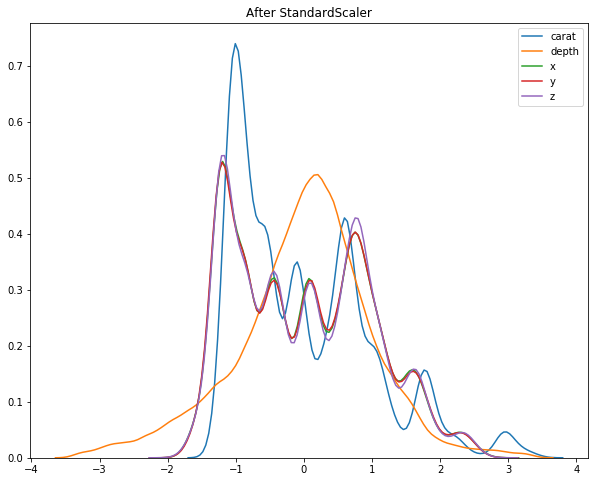

In [30]:

# Some useful literature about scaling data
# http://benalexkeen.com/feature-scaling-with-scikit-learn/
# https://www.kaggle.com/discdiver/guide-to-scaling-and-standardizing
# https://becominghuman.ai/demystifying-feature-scaling-baff53e9b3fd

s_scaler = preprocessing.StandardScaler()

diamonds_z_scaler = s_scaler.fit_transform(diamonds_z)

diamonds_z_scaler = pd.DataFrame(diamonds_z_scaler, columns=column_names)

diamonds_z_scaler

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After StandardScaler')

sns.kdeplot(diamonds_z_scaler['carat'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['depth'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['x'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['y'], ax=ax1)
sns.kdeplot(diamonds_z_scaler['z'], ax=ax1)

In [31]:
diamonds_z_scaler.mean()

#not sure why StandardScaler converts data into negative values!!!

carat      1.594450e-16
cut        2.987473e-15
color     -1.887351e-16
clarity   -5.622941e-16
depth     -2.517951e-15
x         -3.931314e-17
y          3.905821e-16
z          8.242599e-16
price      9.421908e-17
dtype: float64

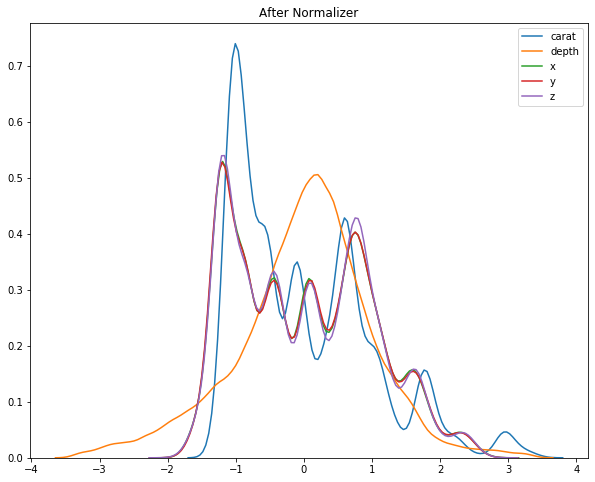

In [32]:
#trying with normalizing

s_scaler = preprocessing.StandardScaler()

diamonds_z_scaler_norm = s_scaler.fit_transform(diamonds_z)

diamonds_z_scaler_norm = pd.DataFrame(diamonds_z_scaler_norm, columns=column_names)

diamonds_z_scaler_norm

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After Normalizer')

sns.kdeplot(diamonds_z_scaler_norm['carat'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['depth'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['x'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['y'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_norm['z'], ax=ax1)


In [33]:
diamonds_z_scaler_norm.mean()
#again normalizer also converts average into negative and I dont know this is the case!!!

carat      1.594450e-16
cut        2.987473e-15
color     -1.887351e-16
clarity   -5.622941e-16
depth     -2.517951e-15
x         -3.931314e-17
y          3.905821e-16
z          8.242599e-16
price      9.421908e-17
dtype: float64

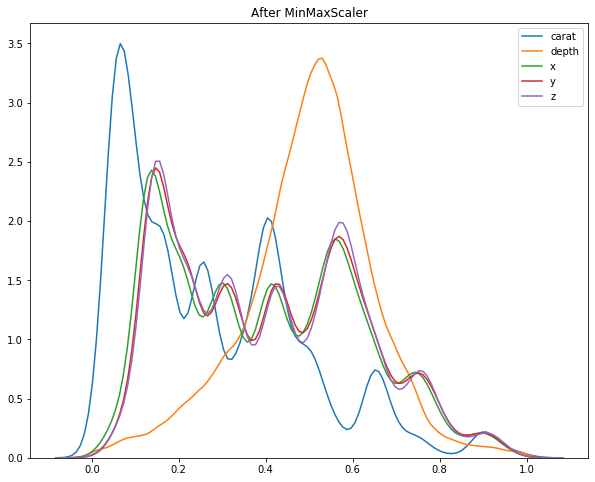

In [34]:
#trying with minmax

mm_scaler = preprocessing.MinMaxScaler()

diamonds_z_scaler_mm= mm_scaler.fit_transform(diamonds_z)

diamonds_z_scaler_mm = pd.DataFrame(diamonds_z_scaler_mm, columns=column_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))

ax1.set_title('After MinMaxScaler')

sns.kdeplot(diamonds_z_scaler_mm['carat'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['depth'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['x'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['y'], ax=ax1)
sns.kdeplot(diamonds_z_scaler_mm['z'], ax=ax1)


In [35]:
diamonds_z_scaler_mm.mean()

#looks like this could be the best method for scaling since is not converting the mean in negative numbers

carat      0.278061
cut        0.653381
color      0.560200
clarity    0.481989
depth      0.499362
x          0.396679
y          0.405929
z          0.406775
price      0.209683
dtype: float64

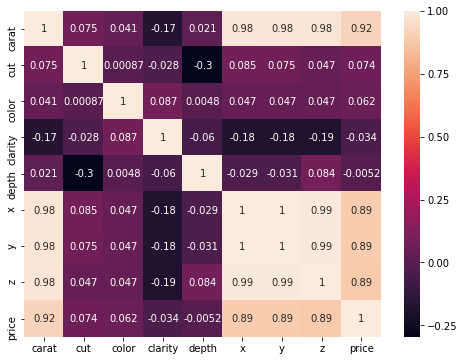

In [36]:
# check correlation between price and rest of variables 
corr_matrix= diamonds_z_scaler_mm.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure (figsize= (8,6))
#sns.heatmap(upper,annot=True)
sns.heatmap(corr_matrix, annot=True)

# from correlation analysis depth, clarity, color and cut have the lowest correlation with price
# z, y, x and carat have the highest correlation with price, being carat the most correlated


In [37]:
diamonds_z_scaler_mm['volumen']=diamonds_z_scaler_mm['x']*diamonds_z_scaler_mm['y']*diamonds_z_scaler_mm['z']

In [38]:
#diamonds_z_scaler_mm

In [39]:
diamonds_z_scaler_mm

carat   cut     color   clarity     depth         x         y  \
0      0.297030  1.00  0.833333  0.428571  0.411765  0.472279  0.476483   
1      0.099010  0.50  0.833333  0.000000  0.682353  0.195072  0.196319   
2      0.054455  0.50  1.000000  0.571429  0.482353  0.135524  0.141104   
3      0.163366  0.75  0.833333  0.428571  0.352941  0.299795  0.316973   
4      0.247525  1.00  0.333333  0.428571  0.388235  0.402464  0.400818   
...         ...   ...       ...       ...       ...       ...       ...   
38885  0.450495  1.00  0.666667  0.142857  0.623529  0.595483  0.588957   
38886  0.262376  0.50  0.833333  0.571429  0.600000  0.418891  0.421268   
38887  0.524752  0.75  0.500000  0.714286  0.200000  0.689938  0.683027   
38888  0.257426  0.50  1.000000  0.428571  0.458824  0.416838  0.439673   
38889  0.168317  1.00  1.000000  0.142857  0.388235  0.316222  0.316973   

              z     price   volumen  
0      0.463816  0.158266  0.104374  
1      0.226974  0.019471  0.008692  
2      0.144737  0.023826  0.002768  
3      0.292763  0.051624  0.027820  
4      0.391447  0.106386  0.063146  
...         ...       ...       ...  
38885  0.618421  0.319541  0.216889  
38886  0.440789  0.156024  0.077784  
38887  0.631579  0.418177  0.297629  
38888  0.427632  0.126241  0.078373  
38889  0.305921  0.065971  0.030664  

[38890 rows x 10 columns]

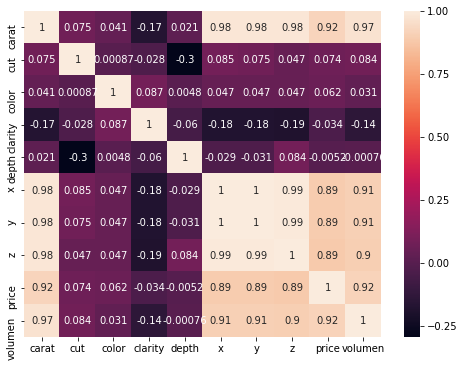

In [40]:
corr_matrix= diamonds_z_scaler_mm.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
plt.figure (figsize= (8,6))
#sns.heatmap(upper,annot=True)
sns.heatmap(corr_matrix, annot=True)

In [41]:
# dropping x,y,z and taking volumen as a function of the three, removed table, removing depth


In [42]:
diamonds_z_scaler_mm_drop=diamonds_z_scaler_mm.drop(['depth','x', 'y', 'z'], axis=1)
diamonds_z_scaler_mm_drop.columns
diamonds_z_scaler_mm_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38890 entries, 0 to 38889
Data columns (total 6 columns):
carat      38890 non-null float64
cut        38890 non-null float64
color      38890 non-null float64
clarity    38890 non-null float64
price      38890 non-null float64
volumen    38890 non-null float64
dtypes: float64(6)
memory usage: 1.8 MB


In [43]:
#train test split

X=diamonds_z_scaler_mm_drop.drop(['price'],axis=1)
y=diamonds_z_scaler_mm_drop['price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

#dont know why but i see randome_state is 42!

In [71]:

models = {
    "decision_tree": DecisionTreeRegressor(random_state = 0),
    "forest": RandomForestRegressor(n_estimators=100)
}

for modelName, model in models.items():
    print(f"Training model: {modelName}")
    model.fit(X_train, y_train)



Training model: decision_tree
Training model: forest


In [63]:
d = {modelName:model.predict(X_test) for modelName, model in models.items()}

df = pd.DataFrame(d)
df["gt"] = y_test.reset_index(drop=True)
df



decision_tree    forest        gt
0          0.116634  0.114118  0.101582
1          0.006789  0.011238  0.011081
2          0.589701  0.562525  0.616281
3          0.019503  0.020045  0.024531
4          0.302504  0.289043  0.268686
...             ...       ...       ...
7773       0.060078  0.061147  0.060078
7774       0.018318  0.015175  0.009671
7775       0.269647  0.281619  0.295011
7776       0.220361  0.209776  0.196055
7777       0.009287  0.009208  0.010632

[7778 rows x 3 columns]

In [60]:
#df.isna().sum()

decision_tree    0
forest           0
gt               0
dtype: int64

In [50]:


error = modelPredictions - yData

SE = numpy.square(error) # squared errors
MSE = numpy.mean(SE) # mean squared errors
RMSE = numpy.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (numpy.var(error) / numpy.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

<class 'pandas.core.series.Series'>


In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
print("mae: %f" %(mae))
Rsquare=regressor.score(X_test,Y_test)
print("Rsquare: %f" %(Rsquare))
rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("rmse: %f" %(rmse))